In [31]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import IsolationForest
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import SGDClassifier
from sklearn.svm import LinearSVC


In [6]:
loan_dataset= pd.read_csv('Loan Prediction_Training Data.csv')

# Data Exploration and Cleaning

## Exploration

In [7]:
loan_dataset

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
251995,251996,8154883,43,13,single,rented,no,Surgeon,Kolkata,West_Bengal,6,11,0
251996,251997,2843572,26,10,single,rented,no,Army_officer,Rewa,Madhya_Pradesh,6,11,0
251997,251998,4522448,46,7,single,rented,no,Design_Engineer,Kalyan-Dombivli,Maharashtra,7,12,0
251998,251999,6507128,45,0,single,rented,no,Graphic_Designer,Pondicherry,Puducherry,0,10,0


In [8]:
loan_dataset.shape

(252000, 13)

In [9]:
loan_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB


In [10]:
loan_dataset.describe()

,Id,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
count,252000.000000,2.520000e+05,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000
mean,126000.500000,4.997117e+06,49.954071,10.084437,6.333877,11.997794,0.123000
std,72746.278255,2.878311e+06,17.063855,6.002590,3.647053,1.399037,0.328438
min,1.000000,1.031000e+04,21.000000,0.000000,0.000000,10.000000,0.000000
25%,63000.750000,2.503015e+06,35.000000,5.000000,3.000000,11.000000,0.000000
50%,126000.500000,5.000694e+06,50.000000,10.000000,6.000000,12.000000,0.000000
75%,189000.250000,7.477502e+06,65.000000,15.000000,9.000000,13.000000,0.000000
max,252000.000000,9.999938e+06,79.000000,20.000000,14.000000,14.000000,1.000000


## Cleaning

### Missing Values



In [11]:
loan_dataset.isnull().sum()

Id                   0
Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
dtype: int64

### Outliers

array([[<Axes: title={'center': 'Id'}>,
        <Axes: title={'center': 'Income'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'Experience'}>,
        <Axes: title={'center': 'CURRENT_JOB_YRS'}>,
        <Axes: title={'center': 'CURRENT_HOUSE_YRS'}>],
       [<Axes: title={'center': 'Risk_Flag'}>, <Axes: >, <Axes: >]],
      dtype=object)

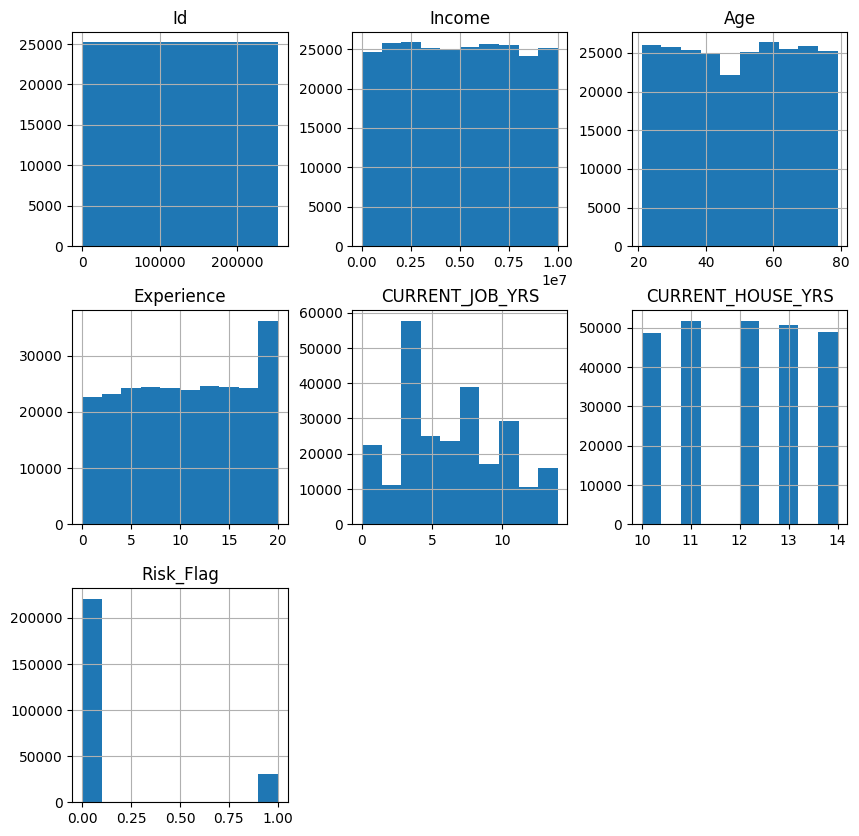

In [12]:
# Boxplots for numerical features
loan_dataset.hist(figsize=(10, 10))


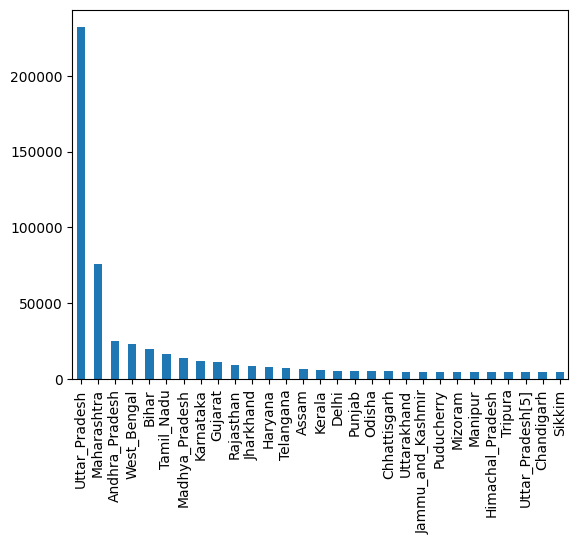

In [13]:
# Bar charts for categorical features
for col in loan_dataset.select_dtypes(include="object"):
    loan_dataset[col].value_counts().plot(kind="bar")


In [14]:
# Isolate potential outliers
outlier_detector = IsolationForest(contamination=0.1)
outlier_labels = outlier_detector.fit_predict(loan_dataset.select_dtypes(exclude="object"))

# Create a new column with outlier flags
loan_dataset["outlier"] = outlier_labels


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [15]:
for col in loan_dataset.select_dtypes(include="object"):
#     print(loan_dataset[col].value_counts(dropna=False))
    print(loan_dataset[col][loan_dataset["outlier"] == 1].value_counts(dropna=False))


single     203153
married     23647
Name: Married/Single, dtype: int64
rented          208324
owned            11944
norent_noown      6532
Name: House_Ownership, dtype: int64
no     157439
yes     69361
Name: Car_Ownership, dtype: int64
Physician                     5364
Statistician                  5276
Web_designer                  4970
Magistrate                    4822
Industrial_Engineer           4819
Psychologist                  4816
Computer_hardware_engineer    4810
Drafter                       4792
Fashion_Designer              4789
Mechanical_engineer           4786
Air_traffic_controller        4774
Technical_writer              4743
Financial_Analyst             4740
Chemical_engineer             4710
Graphic_Designer              4710
Petroleum_Engineer            4700
Comedian                      4640
Flight_attendant              4629
Hotel_Manager                 4550
Biomedical_Engineer           4545
Secretary                     4498
Computer_operator          

In [16]:
# filtered_data = loan_dataset[loan_dataset["outlier"] == 0].copy()


In [17]:
# filtered_data

# Feature Engineering

## Label Encoding

In [18]:
label_encoder = LabelEncoder()
columns_to_encode = [
    "Married/Single",
    "House_Ownership",
    "Car_Ownership",
    "Profession",
    "CITY",
    "STATE",
]
for column in columns_to_encode:
    loan_dataset[column + '_encoded'] = label_encoder.fit_transform(loan_dataset[column])

# loan_dataset['property_area_encoded'] =label_encoder.fit_transform(loan_dataset['Property_Area'])
# # gender_encoded = label_encoder.fit_transform(loan_dataset.Gender)



In [19]:
loan_dataset.replace({'Dependents':{'3+':3}},inplace=True)

# MODEL TRAINING


## Preparing

In [20]:
X = loan_dataset.drop(['Id','Married/Single','House_Ownership','Car_Ownership','Profession','CITY','STATE','Risk_Flag'],axis=1)
Y = loan_dataset['Risk_Flag']

In [21]:
X

,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,outlier,Married/Single_encoded,House_Ownership_encoded,Car_Ownership_encoded,Profession_encoded,CITY_encoded,STATE_encoded
0,1303834,23,3,3,13,1,1,2,0,33,251,13
1,7574516,40,10,9,13,1,1,2,0,43,227,14
2,3991815,66,4,4,10,1,0,2,0,47,8,12
3,6256451,41,2,2,12,-1,1,2,1,43,54,17
4,5768871,47,11,3,14,-1,1,2,0,11,296,22
...,...,...,...,...,...,...,...,...,...,...,...,...
251995,8154883,43,13,6,11,1,1,2,0,45,162,28
251996,2843572,26,10,6,11,1,1,2,0,3,251,13
251997,4522448,46,7,7,12,1,1,2,0,17,144,14
251998,6507128,45,0,0,10,1,1,2,0,27,233,18


In [22]:
X_train, X_test, y_train, y_test =train_test_split(X, Y, test_size = 0.25, random_state = 42)


## Scaling numerical features

In [23]:
# Feature scaling
scaler = StandardScaler()
numerical_features = ['Age', 'Income', 'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS']
X[numerical_features] = scaler.fit_transform(X[numerical_features])



In [24]:
def classify(model, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    model.fit(X_train, y_train)

    # Prediction
    y_pred = model.predict(X_test)

    # Accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy is:", accuracy * 100)

    # Precision
#     precision = precision_score(y_test, y_pred, average='binary')  # Assuming binary classification
    precision = precision_score(y_test, y_pred,  average='binary')

    print("Precision is:", precision * 100)

    # Recall
    recall = recall_score(y_test, y_pred, average='binary')  # Assuming binary classification
    print("Recall is:", recall * 100)

    # F1-score
    f1 = f1_score(y_test, y_pred,  average='binary')  # Assuming binary classification
    print("F1-score is:", f1 * 100)

#     # Cross-validation
#     score = cross_val_score(model, X, y, cv=5)
#     print("Cross-validation score is:", np.mean(score) * 100)


In [48]:
def classify_and_update_results(model, X, y, model_name):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='binary')
    recall = recall_score(y_test, y_pred, average='binary')
    f1 = f1_score(y_test, y_pred,  average='binary')

    # Update results dataframe
    results.loc[len(results)] = [model_name, accuracy, precision, recall, f1]


## Training

In [26]:
model_lr = LogisticRegression(solver='liblinear')
classify(model_lr, X, Y)


Accuracy is: 96.53968253968253
Precision is: 94.66730340655842
Recall is: 76.32186858316223
F1-score is: 84.51044479181469


In [27]:
model_dt = DecisionTreeClassifier()
classify(model_dt, X, Y)

Accuracy is: 96.52380952380952
Precision is: 87.5973154362416
Recall is: 83.75256673511294
F1-score is: 85.63180684949482


In [28]:
model_rf = RandomForestClassifier()
classify(model_rf, X, Y)


Accuracy is: 96.91428571428573
Precision is: 90.04382360996988
Recall is: 84.38141683778234
F1-score is: 87.12071021597987


In [59]:
# model_svm = SVC(kernel='linear', C=1.0, n_jobs=-1)
# classify(model_svm, X, Y)

In [37]:
model_linear_svm = LinearSVC(C=1.0, random_state=42, max_iter=1000, dual=False)

classify(model_linear_svm, X, Y)


Accuracy is: 96.53968253968253
Precision is: 94.66730340655842
Recall is: 76.32186858316223
F1-score is: 84.51044479181469


In [35]:
model_knn = KNeighborsClassifier(n_neighbors=3)
classify(model_knn, X, Y)


Accuracy is: 94.4015873015873
Precision is: 83.2735216102356
Recall is: 68.49332648870636
F1-score is: 75.16372086472784


In [41]:
model_nb = GaussianNB()
classify(model_nb, X, Y)

Accuracy is: 96.53968253968253
Precision is: 94.66730340655842
Recall is: 76.32186858316223
F1-score is: 84.51044479181469


In [44]:
# Define models to compare
models = {
    'Logistic Regression': LogisticRegression(solver='liblinear'),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': LinearSVC(C=1.0, random_state=42, max_iter=1000, dual=False),
    'KNN': KNeighborsClassifier(n_neighbors=3),
    'Naive Bayes': GaussianNB()
}


In [50]:
# # Results Section
results = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-score'])


In [51]:
for model_name, model in models.items():
    classify_and_update_results(model, X, Y, model_name)


# Results

In [55]:
def plot_metrics(results_df, metrics_list, metric_names_list):
    results_df.columns = results_df.columns.str.lower()  # Convert column names to lowercase
    num_models = len(results_df['model'])

    # Define colors for each metric
    colors = ['blue', 'green', 'orange', 'red']

    # Create subplots for each metric
    fig, axes = plt.subplots(nrows=len(metrics_list), ncols=1, figsize=(10, 6 * len(metrics_list)))

    for i, (metric, metric_name, color) in enumerate(zip(metrics_list, metric_names_list, colors)):
        axes[i].bar(results_df['model'], results_df[metric], label=metric_name, color=color)
        axes[i].set_title(f'Comparison of {metric_name}')
        axes[i].set_xlabel('Model')
        axes[i].set_ylabel(metric_name)
        axes[i].legend()

    plt.tight_layout()
    plt.show()



In [56]:
# Define metrics and metric names
metrics = ['accuracy', 'precision', 'recall', 'f1-score']
metric_names = ['Accuracy', 'Precision', 'Recall', 'F1-score']


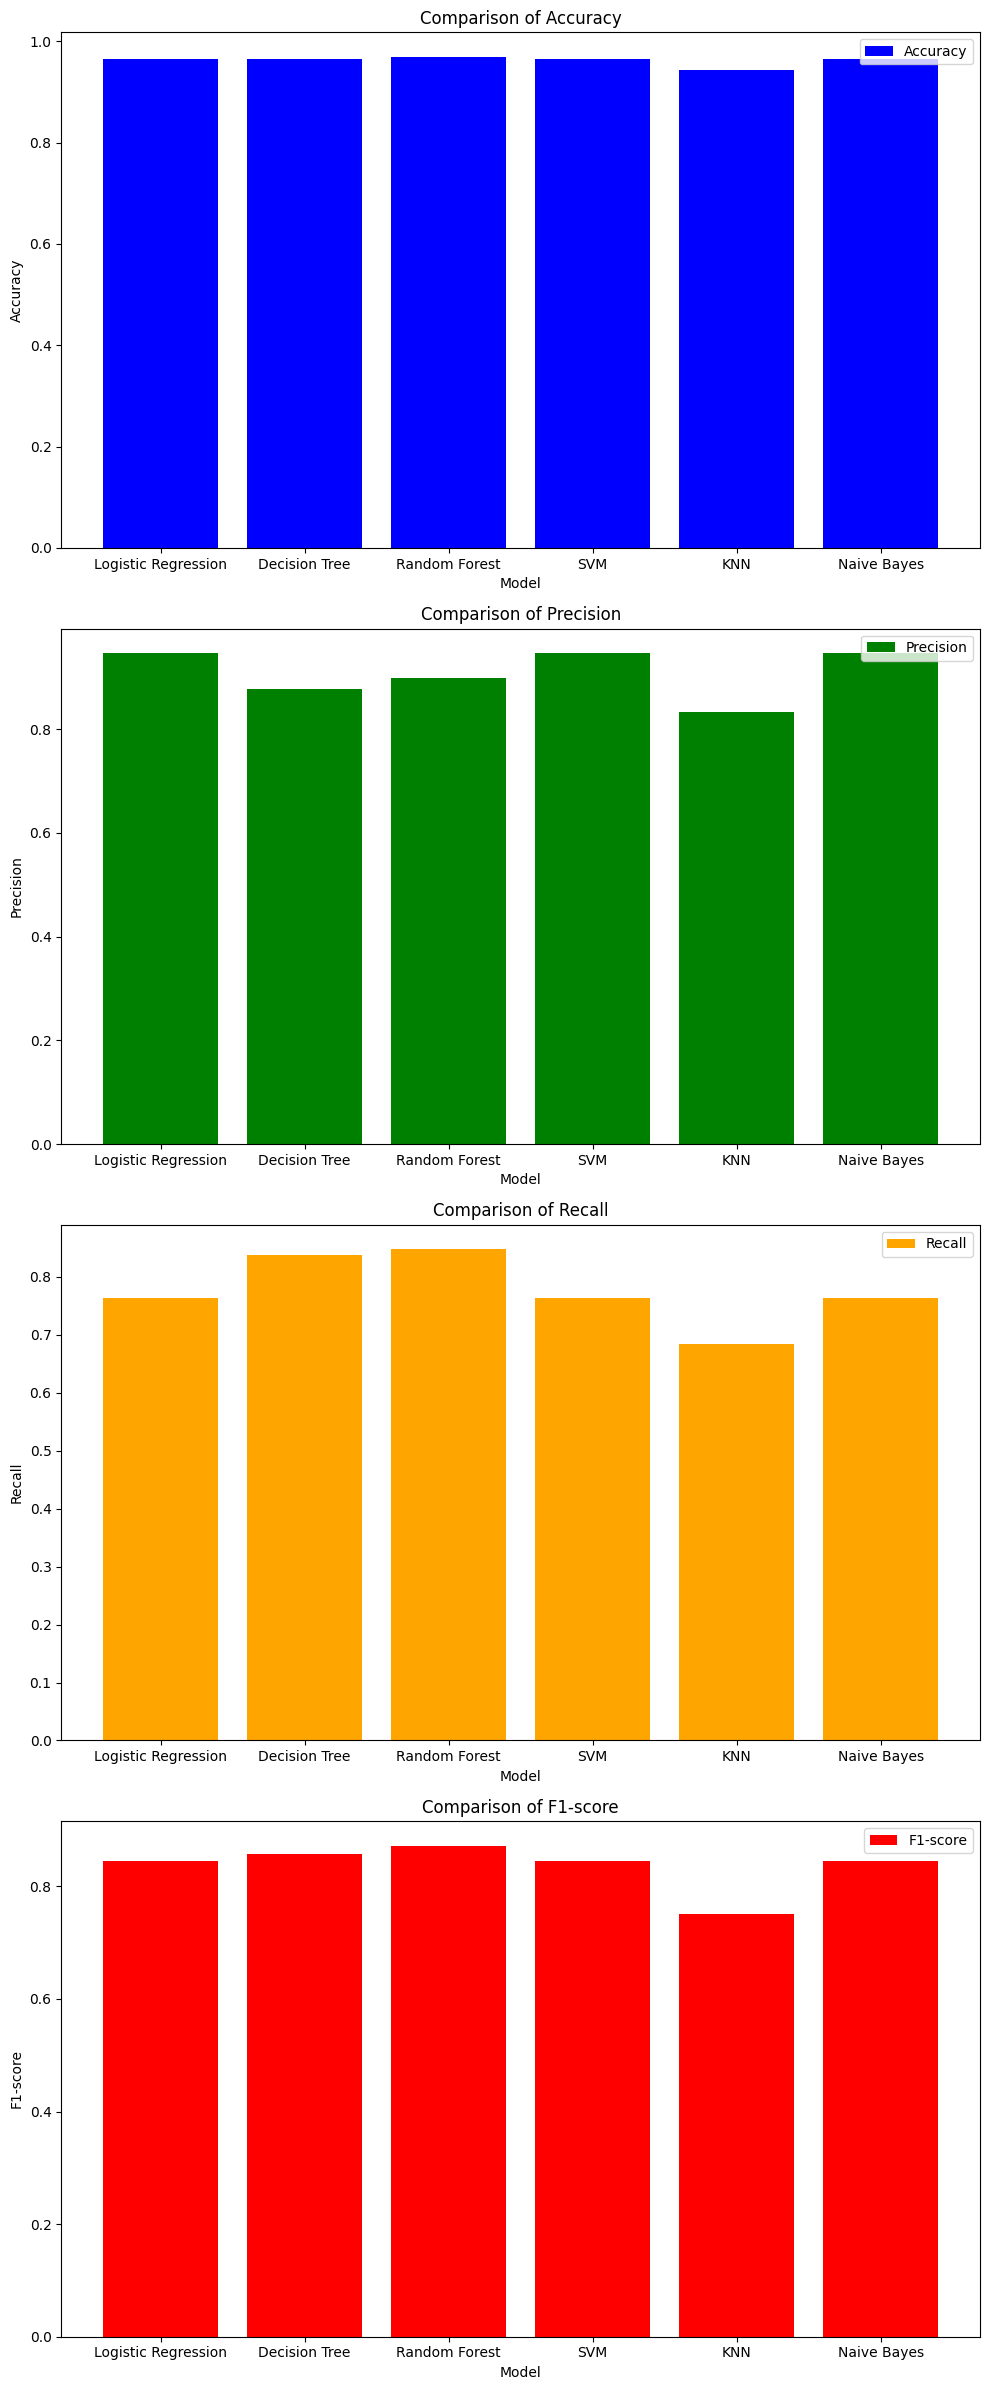

In [57]:
# # Plot the comparison
plot_metrics(results, metrics, metric_names)
